# **Remedial de Clases - Paula Henríquez**

# Proceso de preparación.


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"softofuu","key":"4956edb3210bab90e993a6e0a405d6fd"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Carga de Dataset desde Kaggle

Opción 1: Student Performance Dataset

In [ ]:
!kaggle datasets download -d spscientist/students-performance-in-exams
!unzip students-performance-in-exams.zip

Dataset URL: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
License(s): unknown
students-performance-in-exams.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  students-performance-in-exams.zip
replace StudentsPerformance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: StudentsPerformance.csv  


# Parte 1: Exploración y Preprocesamiento de Datos

1. Carga de datos

In [ ]:
import pandas as pd

In [ ]:
df_sp = pd.read_csv('StudentsPerformance.csv')

2. Revisión inicial

In [ ]:
df_sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df_sp.shape

(1000, 8)

In [ ]:
df_sp.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
df_sp.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
df_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Sobre el análisis general del dataset, podemos decir que este contiene una gran cantidad de datos, con ausencia de datos nulos y con un total de 8 columnas y 1000 filas.


En cuanto a identificar aquellas columnas relevantes para determinar el performance de un alumno en sus exámenes, considero que:

*Math Score, Reading Score y Writing Score* son relevantes a raíz de que con esos puntajes se puede calcular la nota final del alumno.

Por otro lado, la columan *Test Prep. Course *parece relevante porque puede generar un impacto en el estudiante si se tuvo una preparación previa a las evaluaciones.

Y por último, el *Parent Level Of Education*, ya que el nivel de estudios de los padres puede verse reflejadoo en el tipo de ayuda y hábitos que el estudiante puede recibir en casa de su entorno familiar.

3. Visualización de datos

In [ ]:
# Crear la columna 'final grade'
df_sp['final grade'] = (df_sp['math score'] + df_sp['reading score'] + df_sp['writing score']) / 3

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

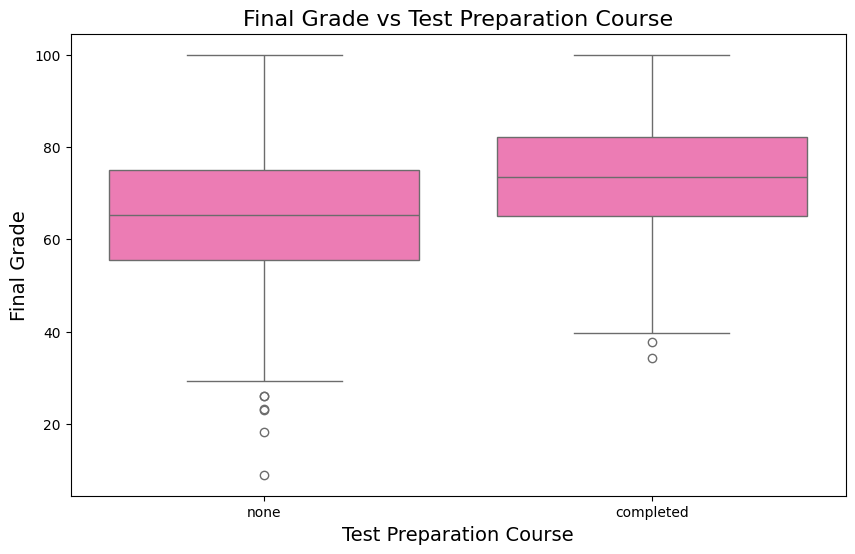

In [ ]:
# Visualización de datos
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="test preparation course",
    y="final grade",
    data=df_sp,
    color="#ff69b4"  # rosa tipo 'hot pink'
)
plt.title("Final Grade vs Test Preparation Course", fontsize=16)
plt.xlabel("Test Preparation Course", fontsize=14)
plt.ylabel("Final Grade", fontsize=14)
plt.show()


4. Preprocesamiento

In [ ]:
# Codificar variables categóricas con LabelEncoder o pd.get_dummies(
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
df_processed = pd.get_dummies(df_sp, columns=categorical_cols, drop_first=True)

In [ ]:
df_processed['approved'] = (df_processed['final grade'] >= 60).astype(int)

In [ ]:
# Separar datos en X e y
X = df_processed.drop(['final grade', 'approved'], axis=1)
y = df_processed['approved']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Normalización de variables numéricas
scaler = StandardScaler()
numeric_cols = ['math score', 'reading score', 'writing score']
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Parte 2: Modelos Supervisados (Clasificación)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Regresión Logística

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

print("Regresión Logística:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(classification_report(y_test, y_pred_lr))

Regresión Logística:
Accuracy: 0.9867
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        86
           1       0.99      0.99      0.99       214

    accuracy                           0.99       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.99      0.99      0.99       300



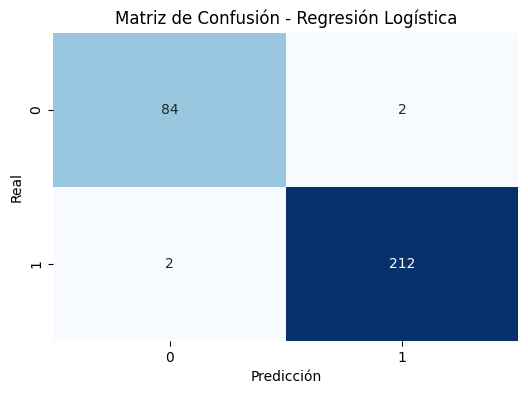

In [ ]:
# Matriz de Confusión
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [ ]:
# KNN

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

print("KNN:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(classification_report(y_test, y_pred_knn))

KNN:
Accuracy: 0.9533
              precision    recall  f1-score   support

           0       0.96      0.87      0.91        86
           1       0.95      0.99      0.97       214

    accuracy                           0.95       300
   macro avg       0.96      0.93      0.94       300
weighted avg       0.95      0.95      0.95       300



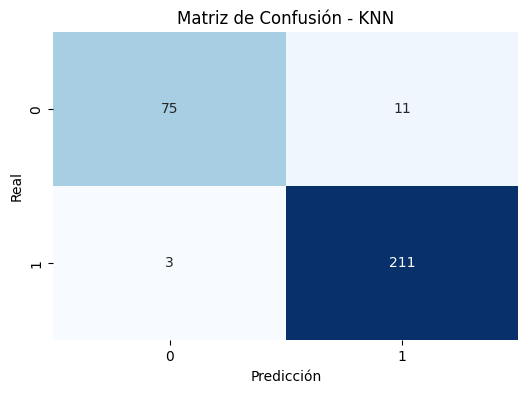

In [ ]:
# Matriz de confusión
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - KNN')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [ ]:
# 16. Árbol de Decisión

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

print("Árbol de Decisión:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(classification_report(y_test, y_pred_dt))

Árbol de Decisión:
Accuracy: 0.9600
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        86
           1       0.96      0.98      0.97       214

    accuracy                           0.96       300
   macro avg       0.96      0.94      0.95       300
weighted avg       0.96      0.96      0.96       300



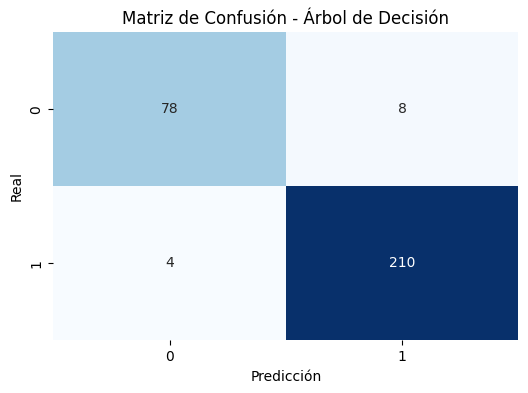

In [ ]:
# Matriz de confusión
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Parte 3: Modelos No Supervisados (Clustering)

In [ ]:
# Preparación de datos para clustering
X_clustering = df_processed[['math score', 'reading score', 'writing score']]

In [ ]:
from sklearn.cluster import KMeans

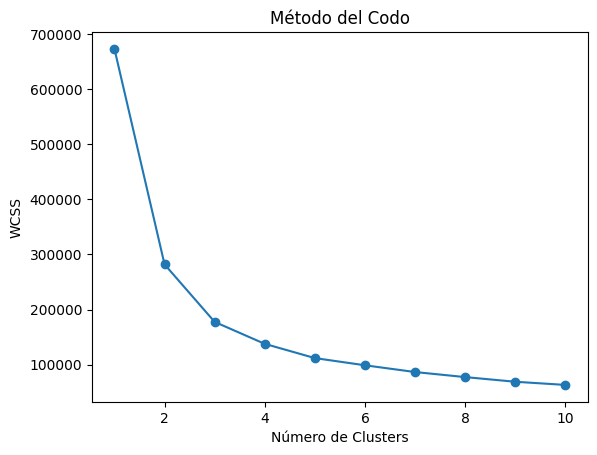

In [ ]:
# K-Means Clustering

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_clustering)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df_processed['cluster'] = kmeans.fit_predict(X_clustering)

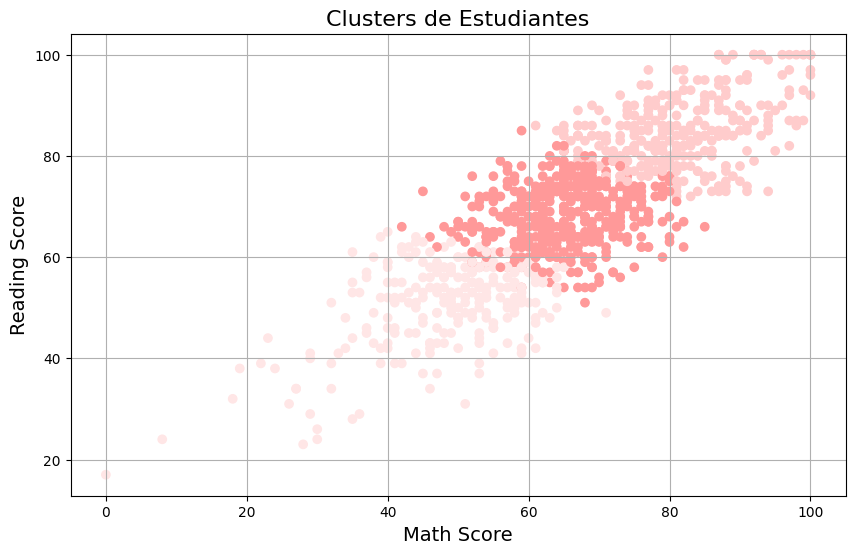

In [ ]:
plt.figure(figsize=(10, 6))
pink_colors = sns.color_palette(["#ff9999", "#ffb3b3", "#ffcccc", "#ffe6e6"])  # Puedes agregar más tonos si es necesario
plt.scatter(X_clustering['math score'], X_clustering['reading score'], c=df_processed['cluster'], cmap=plt.cm.colors.ListedColormap(pink_colors))
plt.title('Clusters de Estudiantes', fontsize=16)
plt.xlabel('Math Score', fontsize=14)
plt.ylabel('Reading Score', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
# Análisis de Clusters
print(df_processed.groupby('cluster').mean())

         math score  reading score  writing score  final grade  gender_male  \
cluster                                                                       
0         65.197727      68.327273      67.695455    67.073485     0.477273   
1         81.661342      84.980831      84.025559    83.555911     0.412141   
2         47.943320      50.631579      48.453441    49.009447     0.578947   

         race/ethnicity_group B  race/ethnicity_group C  \
cluster                                                   
0                      0.190909                0.327273   
1                      0.172524                0.290735   
2                      0.210526                0.340081   

         race/ethnicity_group D  race/ethnicity_group E  \
cluster                                                   
0                      0.277273                0.120455   
1                      0.268371                0.207668   
2                      0.226721                0.089069   

         par

# Parte 4: Análisis Integrado

1. ¿Qué patrones fueron detectados con los modelos supervisados?

A) Regresión Logística

La regresión logística mostró que las variables más significativas para predecir si un estudiante aprobaría o no fueron **(1) Puntajes en Matemáticas, Lectura y Escritura**, **(2) Curso de Preparación para el Examen**.
En el primer caso, aquellos estudiantes con puntajes más altos en estas áreas tienen una mayor probabilidd de aprobar, mientras que aquellos que realizaron un curso de preparación muestran tasas de aprobación más altas.

B) KNN

El modelo KNN también confirmó que los estudiantes con puntajes más altos en las tres materias tienden a ser clasificados como aprobados.

C) Arbol de Decisión

Con el AD, se logró visualizar cómo se toman las decisiones de aprobación, determinando que los puntajes de las materias y la asistencia a cursos de preparación fueron claves para el buen rendimiento académmio.

2. ¿Qué diferencias se observaron en el agrupamiento no supervisado?

Se identificaron varios Clusters que reflejan distintos grupos de estudiantes:

(1) Clusters de alto rendimiento, aquellos estudiantes con puntajes altos en todas las materias y con una alta tasa de aprobación.

(2) Clusters de bajo rendimiento, aquellos estudiantes con bajos puntajes en todas las materias, que generalmente no aprobaron.

(3) Cluster Intermedio: Estudiantes con puntajes miixtos, dejando a algunos en estado de aprobación y otros repruebo.

3. ¿Existen coincidencias entre los estudiantes que reprueban y los clusters de bajo rendimiento?

Al comparar la variable approved con los clusters, se encontró que muchos estudiantes que no aprobaron pertenecen al cluster de bajo rendimiento. Esto permite concluir que los resultados de los modelos tanto supervisados como no supervisados mantienen coherencia en lo que es la evaluación del rendimiento de los estudiantes.


4. ¿Cómo podrían usarse ambos enfoques para diseñar programas de apoyo, tutorías o segmentaciones personalizadas?

Utilizando los resultados de los modelos supervisados, se pueden identificar a los estudiantes en riesgo de reprobar y dirigir recursos específicos hacia ellos.

Por otro lado, los clusters permiten segmentar a los estudiantes en grupos con necesidades similares, como aquellos de bajo rendimiento, que podrían verse beneficiados con tutorías intesivas en las materias necesarias.

Se pueden diseñar programas de tutoría enfocados en las áreas donde los estudiantes tienen más dificultades, siendo importante implementar un sistema de seguimiento para evaluar su progreso a lo largo del programa.